## 데이터 출처
* DACON - 2021 농산물 가격예측 AI 경진대회 (https://dacon.io/competitions/official/235801/data)

## 데이터 정보

- train.csv
  - date : 일자
  - 요일 : 요일
  - 품목_거래량(kg) : 해당 품목의 거래량
  - 품목_가격(원/kg) : 해당 품목의 kg당 가격
  - 품목_가격 산출 방식 : 품목 또는 품종의 총 거래금액 / 총 거래량 (취소된 거래내역 제외)

- train_AT_TSALET_ALL : 전국 도매시장 거래정보 데이터
  - SALEDATE: 경락 일자
  - WHSAL_NM: 도매시장
  - CMP_NM: 법인
  - PUM_NM: 품목
  - KIND_NM: 품종
  - DAN_NM: 단위
  - POJ_NM: 포장
  - SIZE_NM: 크기
  - LV_NM: 등급
  - SAN_NM: 산지
  - DANQ: 단위중량
  - QTY: 물량
  - COST: 단가
  - TOT_QTY: 총물량 (음수로 집계된 값은 거래 취소 내역)
  - TOT_AMT: 총금액

## 라이브러리

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


## 경로

In [2]:
DATA_DIR = "../data_nongsanmul"
TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")

In [89]:
def TSALET_CSV(date):
    return pd.read_csv(os.path.join(DATA_DIR, "train_AT_TSALET_ALL/AT_TSALET_ALL_{}.csv".format(date)), parse_dates = ['SALEDATE'])

In [94]:
df_201601 = TSALET_CSV(201601)
df_201601

,SALEDATE,WHSAL_NM,CMP_NM,PUM_NM,KIND_NM,DAN_NM,POJ_NM,SIZE_NM,LV_NM,SAN_NM,DANQ,QTY,COST,TOT_QTY,TOT_AMT
0,2016-01-09,부산엄궁도매,부산청과,감귤,조생귤,kg,상자,.,보통,제주도 제주시,10.0,62,14400.0,620.0,892800
1,2016-01-09,부산엄궁도매,부산청과,감귤,조생귤,kg,상자,.,보통,제주도 제주시,10.0,29,14700.0,290.0,426300
2,2016-01-09,부산엄궁도매,부산청과,감귤,조생귤,kg,상자,.,특,제주도 제주시,10.0,17,12800.0,170.0,217600
3,2016-01-09,부산엄궁도매,부산청과,감귤,조생귤,kg,상자,.,특,제주도 제주시,10.0,16,8800.0,160.0,140800
4,2016-01-09,부산엄궁도매,부산청과,감귤,조생귤,kg,상자,.,보통,제주 남제주군,10.0,25,7300.0,250.0,182500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2700791,2016-01-30,서울강서도매,강서청과,배,신고,kg,.,.,.,경기 평택시,7.5,60,30000.0,450.0,1800000
2700792,2016-01-30,서울강서도매,강서청과,배,신고,kg,.,.,.,경기 평택시,7.5,60,30000.0,450.0,1800000
2700793,2016-01-30,서울강서도매,강서청과,배,신고,kg,.,.,.,경기 평택시,7.5,36,30000.0,270.0,1080000
2700794,2016-01-30,서울강서도매,강서청과,배,신고,kg,.,.,.,경기 평택시,7.5,35,23000.0,262.5,805000


In [92]:
df_201601['WHSAL_NM'].unique()

array(['부산엄궁도매', '인천삼산도매', '구리도매시장', '인천구월도매', '안산도매시장', '수원도매시장',
       '창원내서도매시장', '대구북부도매', '울산도매시장', '창원팔용도매시장', '진주도매시장', '포항도매시장',
       '구미도매시장', '대전노은도매', '순천도매시장', '안동도매시장', '광주서부도매', '익산도매시장',
       '정읍도매시장', '전주도매시장', '부산반여도매', '천안도매시장', '광주각화도매', '충주도매시장',
       '청주도매시장', '춘천도매시장', '강릉도매시장', '원주도매시장', '서울가락도매', '서울강서도매',
       '대전오정도매', '안양도매시장'], dtype=object)

## DATA

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv(TRAIN_PATH, parse_dates=["date"])
df.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,5475.0,92334.0,1704.0,6359.0,1331.0,40028.0,348.0,4374.9,13242.0,16550.5,2339.0,10528.0,1729.0,13885.0,804.0,3853.0,3703.0,15797.0,2576.0,14634.0,1474.0,30950.0,1621.0,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,5210.0,994328.1,1716.0,262615.5,1212.0,1074699.1,345.0,122613.5,9923.0,427435.1,2153.0,82113.5,3960.0,558950.2,794.0,104930.3,4871.0,277326.5,2440.0,159800.0,1750.0,291057.0,1834.0,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,5387.0,787716.0,1715.0,221850.5,1197.0,825681.9,350.0,79055.9,9529.0,334636.8,2220.0,80144.0,3333.0,444353.7,763.0,100699.5,5129.0,218465.2,2437.0,153084.0,1822.0,194626.5,1833.0,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [6]:
df.dtypes

date              datetime64[ns]
요일                        object
배추_거래량(kg)               float64
배추_가격(원/kg)              float64
무_거래량(kg)                float64
무_가격(원/kg)               float64
양파_거래량(kg)               float64
양파_가격(원/kg)              float64
건고추_거래량(kg)              float64
건고추_가격(원/kg)             float64
마늘_거래량(kg)               float64
마늘_가격(원/kg)              float64
대파_거래량(kg)               float64
대파_가격(원/kg)              float64
얼갈이배추_거래량(kg)            float64
얼갈이배추_가격(원/kg)           float64
양배추_거래량(kg)              float64
양배추_가격(원/kg)             float64
깻잎_거래량(kg)               float64
깻잎_가격(원/kg)              float64
시금치_거래량(kg)              float64
시금치_가격(원/kg)             float64
미나리_거래량(kg)              float64
미나리_가격(원/kg)             float64
당근_거래량(kg)               float64
당근_가격(원/kg)              float64
파프리카_거래량(kg)             float64
파프리카_가격(원/kg)            float64
새송이_거래량(kg)              float64
새송이_가격(원/kg)             float64
팽이버섯_거래량(k

In [7]:
df = df.set_index("date")

In [8]:
(df == 0).sum()

요일                  0
배추_거래량(kg)        253
배추_가격(원/kg)       253
무_거래량(kg)         254
무_가격(원/kg)        254
양파_거래량(kg)        255
양파_가격(원/kg)       255
건고추_거래량(kg)       274
건고추_가격(원/kg)      274
마늘_거래량(kg)        265
마늘_가격(원/kg)       265
대파_거래량(kg)        254
대파_가격(원/kg)       254
얼갈이배추_거래량(kg)     261
얼갈이배추_가격(원/kg)    261
양배추_거래량(kg)       258
양배추_가격(원/kg)      258
깻잎_거래량(kg)        254
깻잎_가격(원/kg)       254
시금치_거래량(kg)       257
시금치_가격(원/kg)      257
미나리_거래량(kg)       260
미나리_가격(원/kg)      260
당근_거래량(kg)        262
당근_가격(원/kg)       262
파프리카_거래량(kg)      265
파프리카_가격(원/kg)     265
새송이_거래량(kg)       258
새송이_가격(원/kg)      258
팽이버섯_거래량(kg)      265
팽이버섯_가격(원/kg)     265
토마토_거래량(kg)       258
토마토_가격(원/kg)      258
청상추_거래량(kg)       259
청상추_가격(원/kg)      259
백다다기_거래량(kg)      263
백다다기_가격(원/kg)     263
애호박_거래량(kg)       258
애호박_가격(원/kg)      258
캠벨얼리_거래량(kg)      305
캠벨얼리_가격(원/kg)     305
샤인마스캇_거래량(kg)     811
샤인마스캇_가격(원/kg)    811
dtype: int64

In [9]:
cabbage_vol = df['배추_거래량(kg)'].resample("M").sum()
cabbage_price = df['배추_가격(원/kg)'].resample("M").sum()
# ax = df['배추_가격(원/kg)'].resample("M").sum().plot()

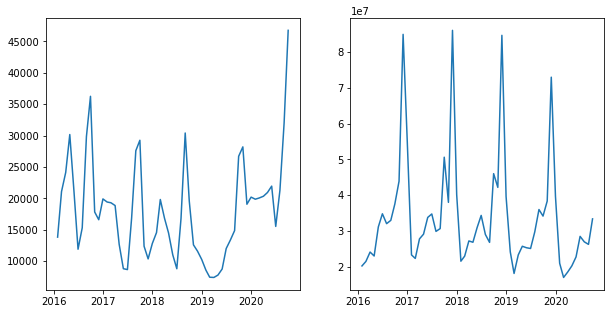

In [10]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(cabbage_price)
ax2.plot(cabbage_vol)
plt.show()

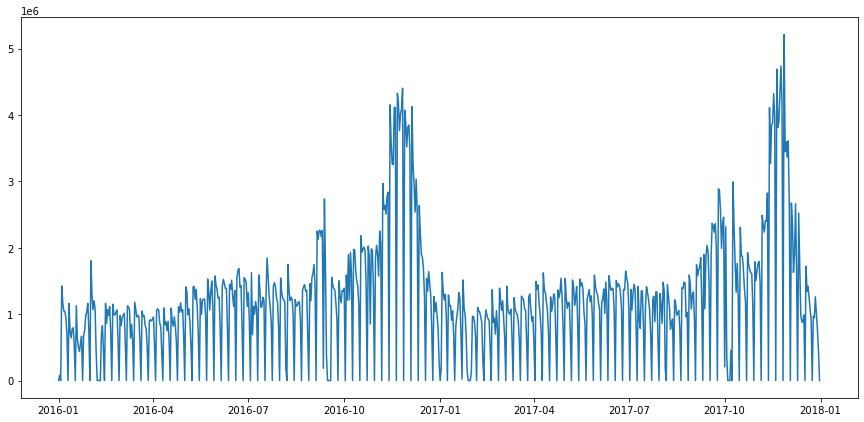

In [11]:
fig, ax = plt.subplots(1,1,figsize = (15,7))
ax.plot(df['배추_거래량(kg)'].resample("D").sum()["2016":"2017"])

plt.show()

In [12]:
df.columns

Index(['요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [57]:
# 가격과 거래량을 나누어 봄
feature_price = []
for i in range(1,22):
    feature_price.append(df.columns[2*i])

feature_vol = []
for i in range(1,22):
    feature_vol.append(df.columns[2*i-1])

* 한글로 변경

In [25]:
plt.rc('font', family='Malgun Gothic')

* 가격 한 번에 다 찍어보기

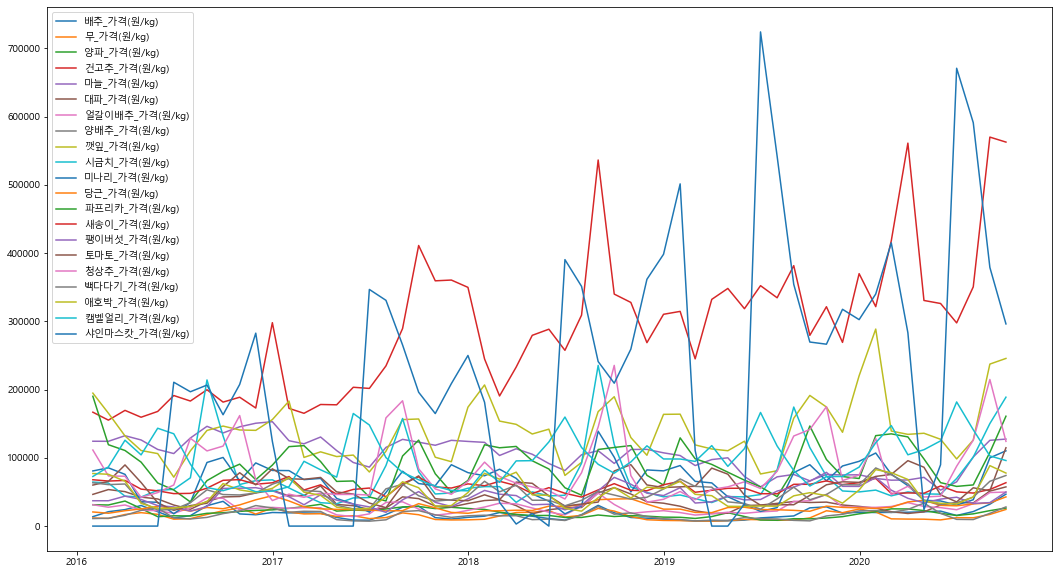

In [58]:
fig = plt.figure()
fig.set_size_inches(18, 10)

ax = fig.add_subplot()
ax.plot(df[feature_price].resample("M").sum(), label=feature_price)
ax.legend()

* 거래량 한 번에 다 찍어보기

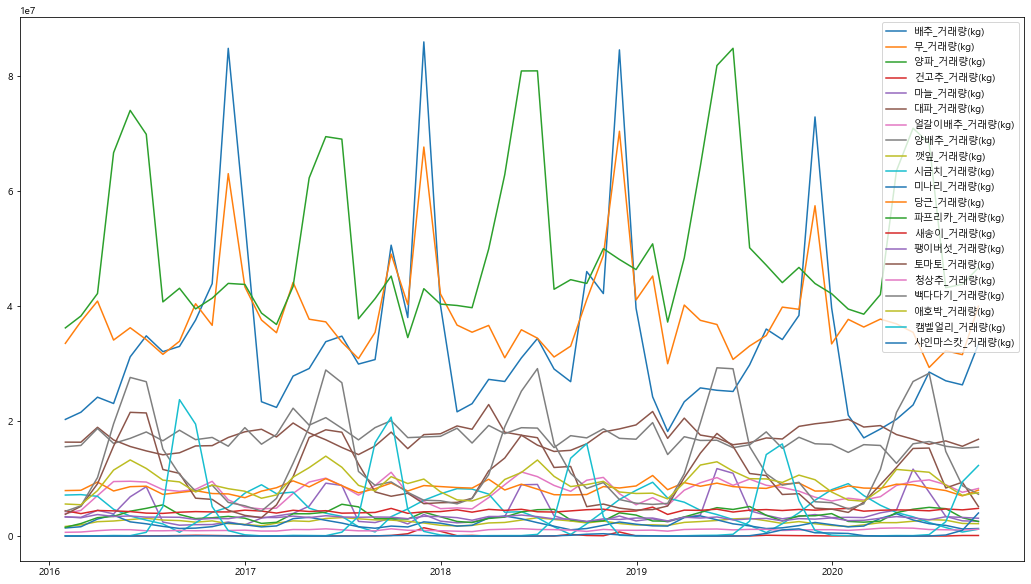

In [52]:
fig = plt.figure()
fig.set_size_inches(18, 10)

ax = fig.add_subplot()
ax.plot(df[feature_vol].resample("M").sum(), label=feature_vol)
ax.legend()